# Movie Recomendation system

In [1]:
import os
os.getcwd()

'C:\\Users\\Chethan\\Data analysis\\Movie Reccomendation'

In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Chethan\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Chethan\AppData\Local\Temp\ipykernel_403500\1790371314.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing movies csv file
movies=pd.read_csv(r'C:\Users\Chethan\Data analysis\Movie Reccomendation\tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
#importing credits csv file
credits=pd.read_csv(r'C:\Users\Chethan\Data analysis\Movie Reccomendation\tmdb_5000_credits.csv')
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
credits.shape

(4803, 4)

In [7]:
movies.shape

(4803, 20)

In [8]:
#Checking for columns
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [9]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [10]:
#Checking for null values
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [11]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

*Since we have title as the same features on both the dataset, we can merge both data set on the basis fo title*

In [12]:
movies=movies.merge(credits, on='title')

In [13]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [14]:
movies.shape

(4809, 23)

In [15]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64

In [16]:
movies['title'].nunique()

4800

Out of 4809 9 titles are duplicate

In [17]:
movies.isnull().sum()/len(movies)*100

budget                   0.000000
genres                   0.000000
homepage                64.379289
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062383
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020794
revenue                  0.000000
runtime                  0.041589
spoken_languages         0.000000
status                   0.000000
tagline                 17.550426
title                    0.000000
vote_average             0.000000
vote_count               0.000000
movie_id                 0.000000
cast                     0.000000
crew                     0.000000
dtype: float64

In [18]:
movies['status'].value_counts()

status
Released           4801
Rumored               5
Post Production       3
Name: count, dtype: int64

<Axes: xlabel='original_language'>

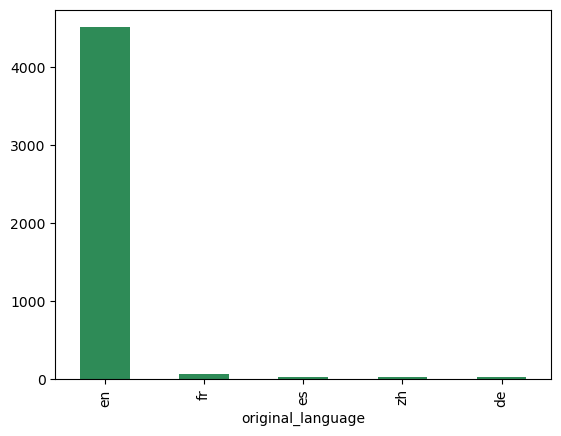

In [19]:
movies['original_language'].value_counts().nlargest().plot(kind='bar',color='seagreen')

From the above graph we can see that almost all of the movies are in english language

In [20]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [21]:
# Significant features to build recommendation system :-
# genres, keywords, overview, title, movie_id, cast, crew

In [22]:
movies['popularity']

0       150.437577
1       139.082615
2       107.376788
3       112.312950
4        43.926995
           ...    
4804     14.269792
4805      0.642552
4806      1.444476
4807      0.857008
4808      1.929883
Name: popularity, Length: 4809, dtype: float64

In [23]:
movies.status

0       Released
1       Released
2       Released
3       Released
4       Released
          ...   
4804    Released
4805    Released
4806    Released
4807    Released
4808    Released
Name: status, Length: 4809, dtype: object

**Making new dataset movies1 with only the significance columns**

In [24]:
movies1=movies[['genres','keywords','overview','title','movie_id','cast','crew']]

In [25]:
movies1.head(2)

,genres,keywords,overview,title,movie_id,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [26]:
movies1['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [27]:
movies1['genres'][50]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 10749, "name": "Romance"}]'

Since its a dictionary values, we can fetch the required value from the feature

In [28]:
import ast

In [29]:
def getvalues(text):
    L=[]
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [30]:
movies1['genres']=movies['genres'].apply(getvalues)
movies1.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [31]:
movies1['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [32]:
movies1['keywords']=movies1['keywords'].apply(getvalues)

In [33]:
movies1.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [34]:
movies1['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [35]:
movies1['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

For cast we will apply the function to pick 3 names

In [36]:
def pickname(text):
    l=[]
    count=0
    for i in ast.literal_eval(text):
        if count<3:
            l.append(i['name'])
        count+=1
    return l

In [37]:
movies1['cast']=movies1['cast'].apply(pickname)

In [38]:
movies1.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",John Carter,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


from crew we need to fetch directors name so we'll write a function

In [39]:
def fetch_dir_name(text):
    l=[]
    for i in ast.literal_eval(text):
        if i['job']=='Director':
            l.append(i['name'])
    return l

In [40]:
movies1['crew']=movies1['crew'].apply(fetch_dir_name)
movies1.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",John Carter,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [41]:
movies1.isnull().sum()

genres      0
keywords    0
overview    3
title       0
movie_id    0
cast        0
crew        0
dtype: int64

we can drop na

In [42]:
movies1.shape

(4809, 7)

In [43]:
movies1.dropna(inplace=True)

In [44]:
movies1.shape

(4806, 7)

now we will remove the space in features except title feature

In [45]:
def remove_space(text):
    l=[]
    for i in text:
        l.append(i.replace(' ',''))
    return l

In [46]:
movies1['genres']=movies1['genres'].apply(remove_space)
movies1['keywords']=movies1['keywords'].apply(remove_space)
movies1['cast']=movies1['cast'].apply(remove_space)
movies1['crew']=movies1['crew'].apply(remove_space)

In [47]:
movies1.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...",John Carter,49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [48]:
def split_words(text):
    l=[]
    l+=text.split()
    return l

In [49]:
movies2=movies1.copy()

In [50]:
movies2['overview']=movies2['overview'].apply(split_words)
movies2.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",Spectre,206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",The Dark Knight Rises,49026,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",John Carter,49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


**Merging features - genres, keywords, overview, cast & crew to a single new column overall**

In [51]:
movies2['overall'] = movies2['genres'] + movies2['keywords'] + movies2['overview'] + movies2['cast'] + movies2['crew'] 

In [52]:
movies2.head(1)

,genres,keywords,overview,title,movie_id,cast,crew,overall
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c..."


In [53]:
new_movie=movies2.drop(columns=['genres','keywords','overview','cast','crew'],axis=1)

In [54]:
new_movie.head()

,title,movie_id,overall
0,Avatar,19995,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,Spectre,206647,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,John Carter,49529,"[Action, Adventure, ScienceFiction, basedonnov..."


joing the overall feature

In [55]:
new_movie['overall'] = new_movie['overall'].apply(lambda x: " ".join(x))

In [56]:
new_movie['overall'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [74]:
import nltk

In [75]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [78]:
def stem(text):
    w=[]
    for i in text.split():
        w.append(ps.stem(i))
    return " ".join(w)

In [79]:
#Breaking the words down to its root words
new_movie['overall']=new_movie['overall'].apply(stem)

In [80]:
new_movie['overall']

0       action adventur fantasi sciencefict culturecla...
1       adventur fantasi action ocean drugabus exotici...
2       action adventur crime spi basedonnovel secreta...
3       action crime drama thriller dccomic crimefight...
4       action adventur sciencefict basedonnovel mar m...
                              ...                        
4804    action crime thriller unitedstates–mexicobarri...
4805    comedi romanc a newlyw couple' honeymoon is up...
4806    comedi drama romanc tvmovi date loveatfirstsig...
4807    when ambiti new york attorney sam is sent to s...
4808    documentari obsess camcord crush dreamgirl eve...
Name: overall, Length: 4806, dtype: object

# Bag of Words (BOW) - Feature Extraction

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, stop_words='english')

In [82]:
vector = cv.fit_transform(new_movie['overall']).toarray()

In [83]:
vector.shape

(4806, 10000)

In [84]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Building Recommendation System basis similarity matrix

In [85]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [86]:
similarity

array([[1.        , 0.07194017, 0.07396705, ..., 0.03933686, 0.        ,
        0.        ],
       [0.07194017, 1.        , 0.055577  , ..., 0.02216755, 0.        ,
        0.02423931],
       [0.07396705, 0.055577  , 1.        , ..., 0.02279212, 0.        ,
        0.        ],
       ...,
       [0.03933686, 0.02216755, 0.02279212, ..., 1.        , 0.03739788,
        0.03976214],
       [0.        , 0.        , 0.        , ..., 0.03739788, 1.        ,
        0.08178608],
       [0.        , 0.02423931, 0.        , ..., 0.03976214, 0.08178608,
        1.        ]])

In [87]:
new_movie.head()

,title,movie_id,overall
0,Avatar,19995,action adventur fantasi sciencefict culturecla...
1,Pirates of the Caribbean: At World's End,285,adventur fantasi action ocean drugabus exotici...
2,Spectre,206647,action adventur crime spi basedonnovel secreta...
3,The Dark Knight Rises,49026,action crime drama thriller dccomic crimefight...
4,John Carter,49529,action adventur sciencefict basedonnovel mar m...


In [88]:
new_movie[new_movie['title']=='Spectre'].index[0]

2

In [89]:
def recommendation(movies):
    index = new_movie[new_movie['title']==movies].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key = lambda x :x[1])
    for i in distances[1:6]:
        print(new_movie.iloc[i[0]].title)

In [90]:
recommendation('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Titan A.E.
Independence Day


In [91]:
import pickle

In [92]:
pickle.dump(new_movie, open('movie_list.pkl','wb'))
pickle.dump(similarity, open('similarity.pkl','wb'))